In [24]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import re
import random

In [25]:
# Loading in the data
# 77_cancer_proteomes_CPTAC_itraq and therefore will be our main data set
pre_data = pd.read_csv("Data/77_cancer_proteomes_CPTAC_itraq.csv")
clinical = pd.read_csv("Data/clinical_data_breast_cancer.csv")
PAM50 = pd.read_csv("Data/PAM50_proteins.csv")

# Data Preparation and Exploration

In [26]:
# The data is made up of 12553 rows and 86 columns
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RefSeq_accession_number  12553 non-null  object 
 1   gene_symbol              10773 non-null  object 
 2   gene_name                12553 non-null  object 
 3   AO-A12D.01TCGA           11334 non-null  float64
 4   C8-A131.01TCGA           11335 non-null  float64
 5   AO-A12B.01TCGA           11334 non-null  float64
 6   BH-A18Q.02TCGA           12024 non-null  float64
 7   C8-A130.02TCGA           12025 non-null  float64
 8   C8-A138.03TCGA           11833 non-null  float64
 9   E2-A154.03TCGA           11833 non-null  float64
 10  C8-A12L.04TCGA           11732 non-null  float64
 11  A2-A0EX.04TCGA           11732 non-null  float64
 12  AO-A12D.05TCGA           11276 non-null  float64
 13  AN-A04A.05TCGA           11276 non-null  float64
 14  BH-A0AV.05TCGA        

In [27]:
pre_data.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [28]:
# As we can see the first column contains the the proteins, the second the gene_symbol, the third the gene name. All other columns the IDs of the different samples.
# These numerical values are indicating the protein expression in the given sample. Positive values are the ones that show a higher expression than normal, while negative ones show lower expression
# For the analysis the gene symbol and name won't be needed and therefore we delete these columns.
pre_data.pop("gene_symbol")
pre_data.pop("gene_name")
pre_data.head(n=3)

,RefSeq_accession_number,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747


In [29]:
# In my opinion it is a bit strange that the samples are in the columns so I transpose the dataset
proteins=pre_data.RefSeq_accession_number.tolist()
proteome_samples = pre_data.iloc[:,3:]
data = proteome_samples.transpose()
data.columns = proteins
samples = data.index
data.head()
# Now in the rows are the different samples and in the columns the different protein expression values

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997
C8-A138.03TCGA,2.765081,2.779709,2.779709,2.797995,2.787023,2.779709,2.783366,2.783366,2.205538,0.749997,...,-3.250913,1.711825,-0.248402,NaN,4.707022,4.107251,-3.203370,1.971481,NaN,NaN
E2-A154.03TCGA,0.862659,0.870186,0.870186,0.866423,0.870186,0.870186,0.870186,0.870186,1.920171,2.349197,...,-3.386203,-2.328692,-2.806642,NaN,-4.733495,-9.584499,-4.786183,-3.103949,NaN,NaN


<AxesSubplot: title={'center': 'C8-A12T.06TCGA'}, ylabel='Frequency'>

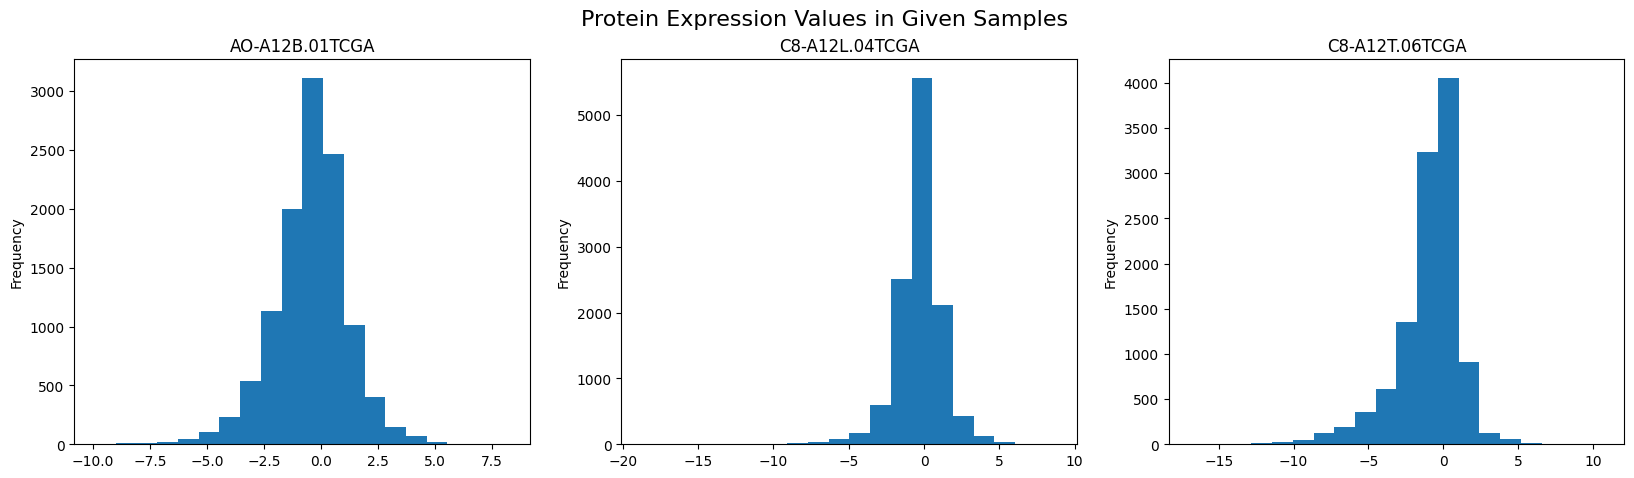

In [30]:
# We can also plot these values. Here we can see the protein expression values in one sample and their distribution
plt.figure(figsize=(20,5))
plt.suptitle("Protein Expression Values in Given Samples", fontsize=16)
plt.subplot(1,3,1)
data.loc[samples[0]].plot(kind="hist", bins = 20, title = samples[0])
plt.subplot(1,3,2)
data.loc[samples[5]].plot(kind="hist", bins = 20, title = samples[5])
plt.subplot(1,3,3)
data.loc[samples[10]].plot(kind="hist", bins = 20, title = samples[10])

<AxesSubplot: title={'center': 'NP_076965'}, ylabel='Frequency'>

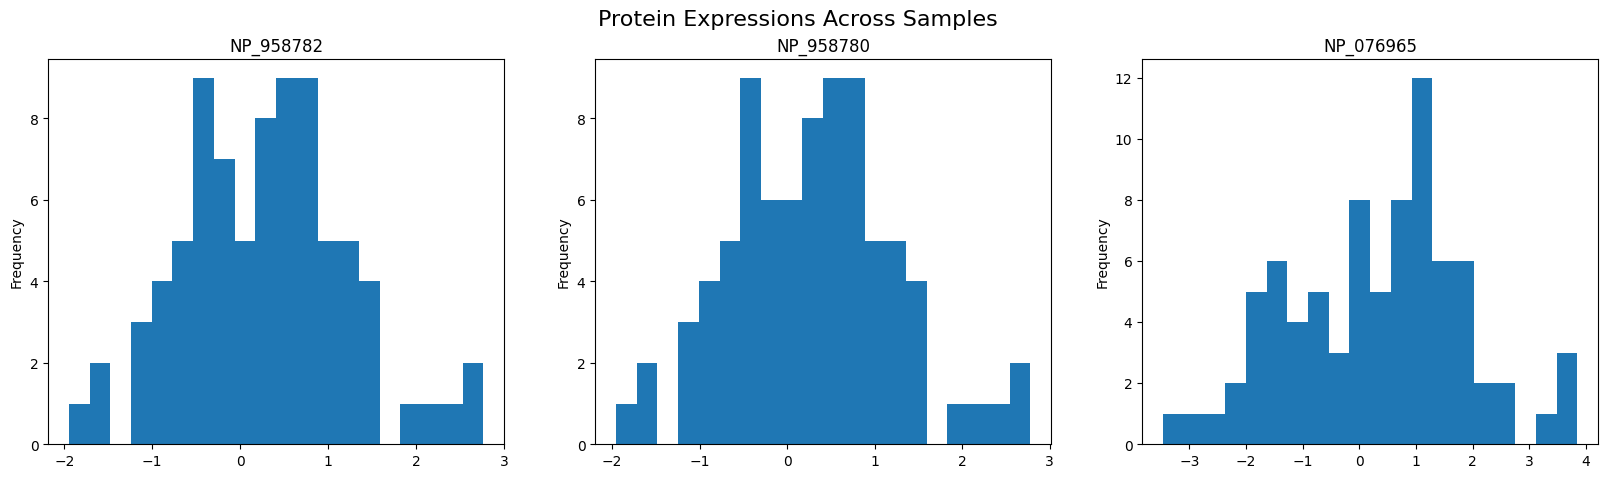

In [31]:
# We can also plot these values. Here we can see the protein expression values in one sample and their distribution
plt.figure(figsize=(20,5))
plt.suptitle("Protein Expressions Across Samples", fontsize=16)
plt.subplot(1,3,1)
data[proteins[0]].plot(kind="hist", bins = 20, title = proteins[0])
plt.subplot(1,3,2)
data[proteins[5]].plot(kind="hist", bins = 20, title = proteins[5])
plt.subplot(1,3,3)
data[proteins[10]].plot(kind="hist", bins = 20, title = proteins[10])

In [32]:
# Another important dataset is the clinical data
# These data contain information about the samples taken in the study. Complete TCGA ID conencts the two datasets. In my case through the mana datasets indexes
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Complete TCGA ID                     105 non-null    object 
 1   Gender                               105 non-null    object 
 2   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 3   ER Status                            105 non-null    object 
 4   PR Status                            105 non-null    object 
 5   HER2 Final Status                    105 non-null    object 
 6   Tumor                                105 non-null    object 
 7   Tumor--T1 Coded                      105 non-null    object 
 8   Node                                 105 non-null    object 
 9   Node-Coded                           105 non-null    object 
 10  Metastasis                           105 non-null    object 
 11  Metastasis-Coded                

In [33]:
clinical.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [34]:
# The last dataset contains information about the proteins
PAM50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GeneSymbol       100 non-null    object
 1   RefSeqProteinID  100 non-null    object
 2   Species          100 non-null    object
 3   Gene Name        100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


# Handeling Missing Values

Text(0.5, 0, 'Mising Values')

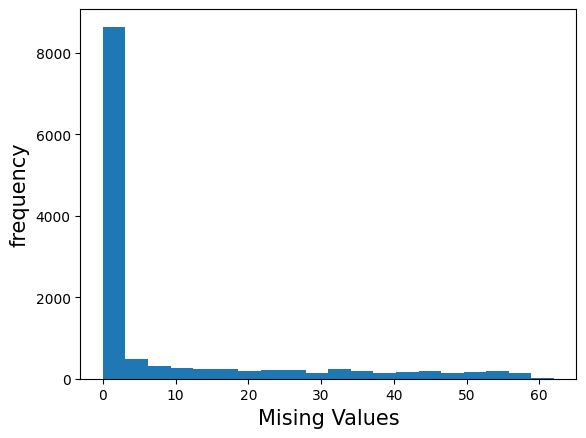

In [35]:
# Lets see the missing values. For that lets count how many there are
mising_values=data.isna().sum()
mising_values.sort_values(ascending=False).plot(kind='hist',bins=20)
plt.ylabel('frequency',fontsize=15)
plt.xlabel('Mising Values',fontsize=15)

In [36]:
# As it can be seen, most columns have only a few missing components
# As there are only 83 samples i discard any protein that has missing values more then 10%
# get features with mising values values greater than 8
mising_values[mising_values>0].shape,mising_values[mising_values>8].shape
# get list of features with missing values greater than 8
missing_value_indexes=mising_values[mising_values>8].index.tolist()
# filter columns in dataset to remove feaures with missing values greater than 8
comp_cases=[n for n in data.columns if n not in missing_value_indexes] 
fl_proteome=data[comp_cases]
# Other missing values are filled using the columnwise mean
fl_proteome=fl_proteome.fillna(fl_proteome.mean())
fl_proteome.head(n = 3)

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_653179,NP_000610,NP_699178,NP_006140,NP_068835
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,-3.071010,0.396103,1.648810,-2.813263,-7.350166,-0.332794,-2.472722,-2.580459,0.660707,4.023963
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,2.353112,3.467124,0.422827,0.389373,0.513152,-1.116049,-9.750480,1.292626,-1.554294,-0.002037
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,-1.445222,-1.284508,0.493181,2.369266,-0.100475,-0.815487,0.745731,-0.933562,2.753011,1.165554


# Scaling Data

In [37]:
# Scaling the data using sklearn
scaled_data = StandardScaler().fit_transform(fl_proteome)
scaled_data =pd.DataFrame(scaled_data)
scaled_data.columns = fl_proteome.columns
scaled_data.head()
print(scaled_data.shape)

(81, 9350)


C:\Users\jmton\AppData\Local\Temp\ipykernel_67412\2492698682.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  sc.set_xticklabels(x)


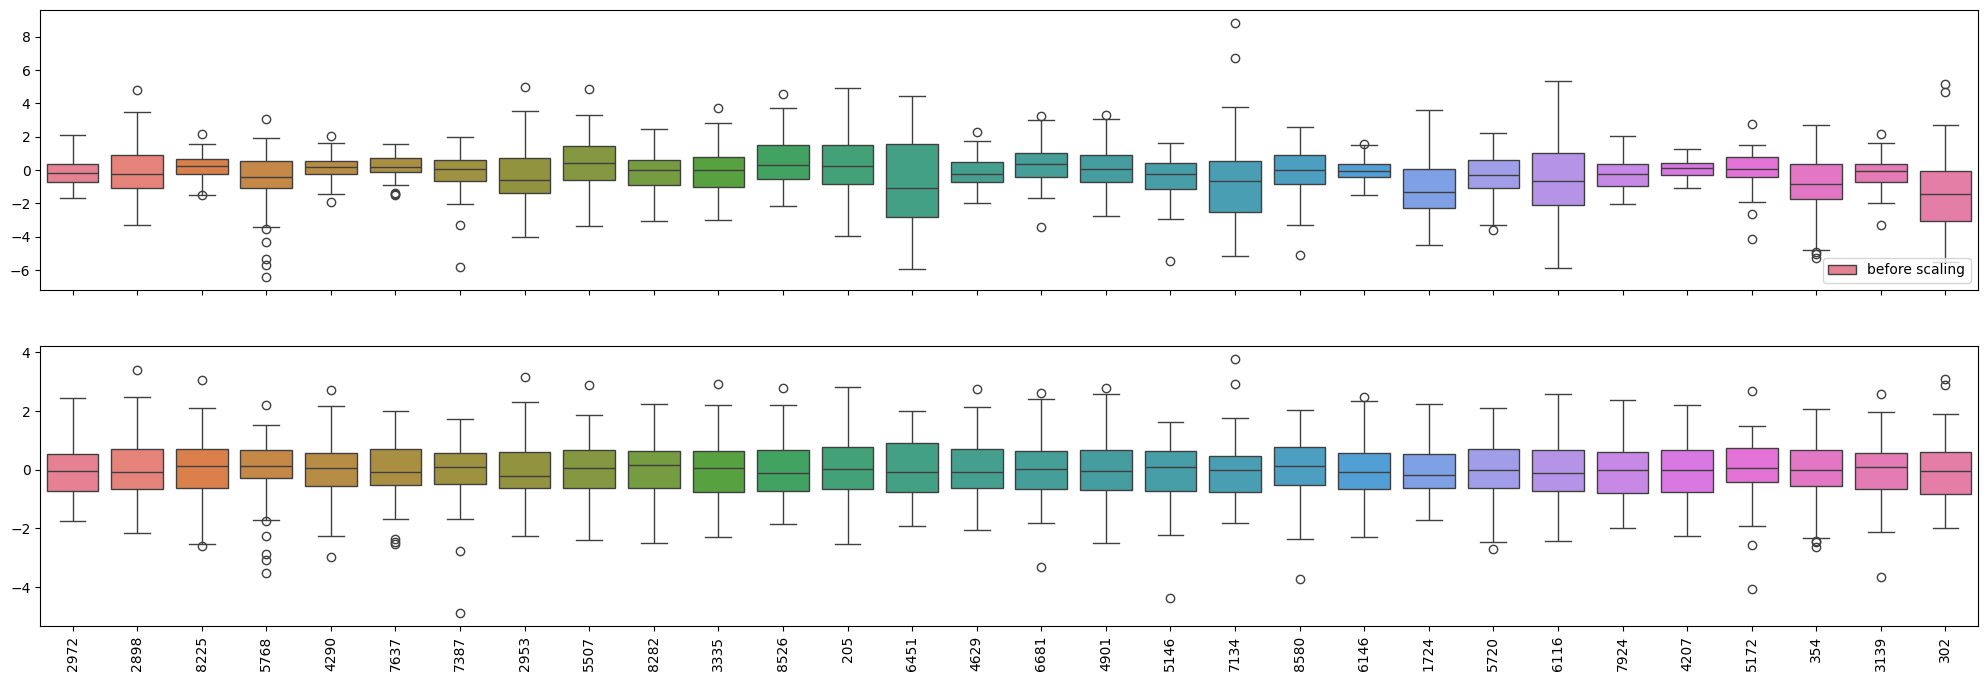

In [38]:
# Lets plot the scaled and unscaled values so we see the effects of scaling
x = [np.random.randint(0,9000) for n in range(30)]
unscaled_protein_expressions = fl_proteome.iloc[:,x]
scaled_protein_expressions = scaled_data.iloc[:,x]
fig,axs=plt.subplots(2,sharex=True,figsize=(25,8))
us = sns.boxplot(data = unscaled_protein_expressions, ax = axs[0])
us.legend(['before scaling'],loc='lower right')
sc = sns.boxplot(data = scaled_protein_expressions, ax = axs[1])
sc.set_xticklabels(x)
plt.xticks(rotation=90)
plt.show()

# Merging the main dataset with the clinical data

In [39]:
## First we re insert the sample names into the scaled data set as the first column after we changed them to be the same format as in the clinical data
def transform_id(original_id):
    # Split the ID at the dot and take the first part
    base_id = original_id.split('.')[0]
    
    # Add "TCGA-" prefix
    transformed_id = f"TCGA-{base_id}"
    
    return transformed_id

transformed_samples = []

for id in samples:
    transformed = transform_id(id)
    transformed_samples.append(transformed)

scaled_data.insert(0, "Complete TCGA ID", transformed_samples)
scaled_data.head()

,Complete TCGA ID,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_653179,NP_000610,NP_699178,NP_006140,NP_068835
0,TCGA-AO-A12B,-0.997465,-0.989815,-0.995310,-0.970553,-0.980553,-0.995488,-0.988125,-0.988121,-0.138388,...,-1.512786,0.304049,0.788866,-1.338334,-2.324177,-0.237028,0.000000,-1.594241,0.000000,2.745424
1,TCGA-BH-A18Q,-0.092149,-0.077231,-0.076714,-0.084582,-0.077363,-0.076735,-0.076108,-0.076186,-0.349505,...,0.836233,2.054384,0.129958,0.199649,-0.173962,-1.055549,-1.998355,0.708751,-0.901580,-0.063841
2,TCGA-C8-A130,-0.821976,-0.836855,-0.833005,-0.841856,-0.836471,-0.836619,-0.831798,-0.831809,-0.758893,...,-0.808708,-0.653820,0.167770,1.150441,-0.341758,-0.741454,0.883735,-0.614972,0.851639,0.750882
3,TCGA-C8-A138,2.628283,2.630774,2.631758,2.658117,2.636521,2.632197,2.634073,2.633754,1.289502,...,-0.097179,1.179010,-1.362946,-0.157557,-0.255203,-0.083865,2.089937,0.155590,0.060162,0.006679
4,TCGA-E2-A154,0.614302,0.614237,0.614873,0.614730,0.613635,0.614970,0.614930,0.614791,1.145202,...,1.817311,0.406947,0.244989,-0.221877,-0.143222,0.988654,-1.279025,0.777562,0.613745,-0.875896


In [40]:
# Now we collect all samples that are present in the clinical set as well
clinical_ids = clinical["Complete TCGA ID"]

# Finding common samples in the two dataset
def find_common_strings(list1, list2):
    # Convert lists to sets for efficient comparison
    set1 = set(list1)
    set2 = set(list2)
    
    # Find the intersection of the two sets
    common_strings = set1.intersection(set2)
    
    # Convert back to a list if needed
    return list(common_strings)

common_ids = find_common_strings(transformed_samples, clinical_ids)

In [41]:
# Merging the main and clinical dataset
merged_dataset = pd.merge(scaled_data, clinical, how='inner', on=['Complete TCGA ID'])
merged_dataset = merged_dataset.set_index("Complete TCGA ID")
merged_dataset.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12B,-0.997465,-0.989815,-0.995310,-0.970553,-0.980553,-0.995488,-0.988125,-0.988121,-0.138388,0.498328,...,Luminal B,-3,-12,3,2,LumA/B,3,4,3,3
TCGA-AO-A12B,-1.319372,-1.295505,-1.301229,-1.291348,-1.291797,-1.295426,-1.299650,-1.299619,-0.458977,0.567644,...,Luminal B,-3,-12,3,2,LumA/B,3,4,3,3
TCGA-BH-A18Q,-0.092149,-0.077231,-0.076714,-0.084582,-0.077363,-0.076735,-0.076108,-0.076186,-0.349505,-0.663668,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-C8-A130,-0.821976,-0.836855,-0.833005,-0.841856,-0.836471,-0.836619,-0.831798,-0.831809,-0.758893,-0.589025,...,HER2-enriched,0,-2,4,2,Her2,1,1,1,1
TCGA-C8-A138,2.628283,2.630774,2.631758,2.658117,2.636521,2.632197,2.634073,2.633754,1.289502,0.182976,...,HER2-enriched,-5,-2,1,2,Basal,2,1,3,2


In [42]:
# Displaying the protein expression distribution
protein_ids = [col for col in merged_dataset if col.startswith('NP')]
len(protein_ids)

9265

In [43]:
merged_dataset[protein_ids].head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_653179,NP_000610,NP_699178,NP_006140,NP_068835
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12B,-0.997465,-0.989815,-0.995310,-0.970553,-0.980553,-0.995488,-0.988125,-0.988121,-0.138388,0.498328,...,-1.512786,0.304049,0.788866,-1.338334,-2.324177,-0.237028,0.000000,-1.594241,0.000000,2.745424
TCGA-AO-A12B,-1.319372,-1.295505,-1.301229,-1.291348,-1.291797,-1.295426,-1.299650,-1.299619,-0.458977,0.567644,...,-1.389076,0.293682,1.058677,-1.372915,-2.835582,1.117293,-0.590686,-1.522548,-1.882590,3.277111
TCGA-BH-A18Q,-0.092149,-0.077231,-0.076714,-0.084582,-0.077363,-0.076735,-0.076108,-0.076186,-0.349505,-0.663668,...,0.836233,2.054384,0.129958,0.199649,-0.173962,-1.055549,-1.998355,0.708751,-0.901580,-0.063841
TCGA-C8-A130,-0.821976,-0.836855,-0.833005,-0.841856,-0.836471,-0.836619,-0.831798,-0.831809,-0.758893,-0.589025,...,-0.808708,-0.653820,0.167770,1.150441,-0.341758,-0.741454,0.883735,-0.614972,0.851639,0.750882
TCGA-C8-A138,2.628283,2.630774,2.631758,2.658117,2.636521,2.632197,2.634073,2.633754,1.289502,0.182976,...,-0.097179,1.179010,-1.362946,-0.157557,-0.255203,-0.083865,2.089937,0.155590,0.060162,0.006679


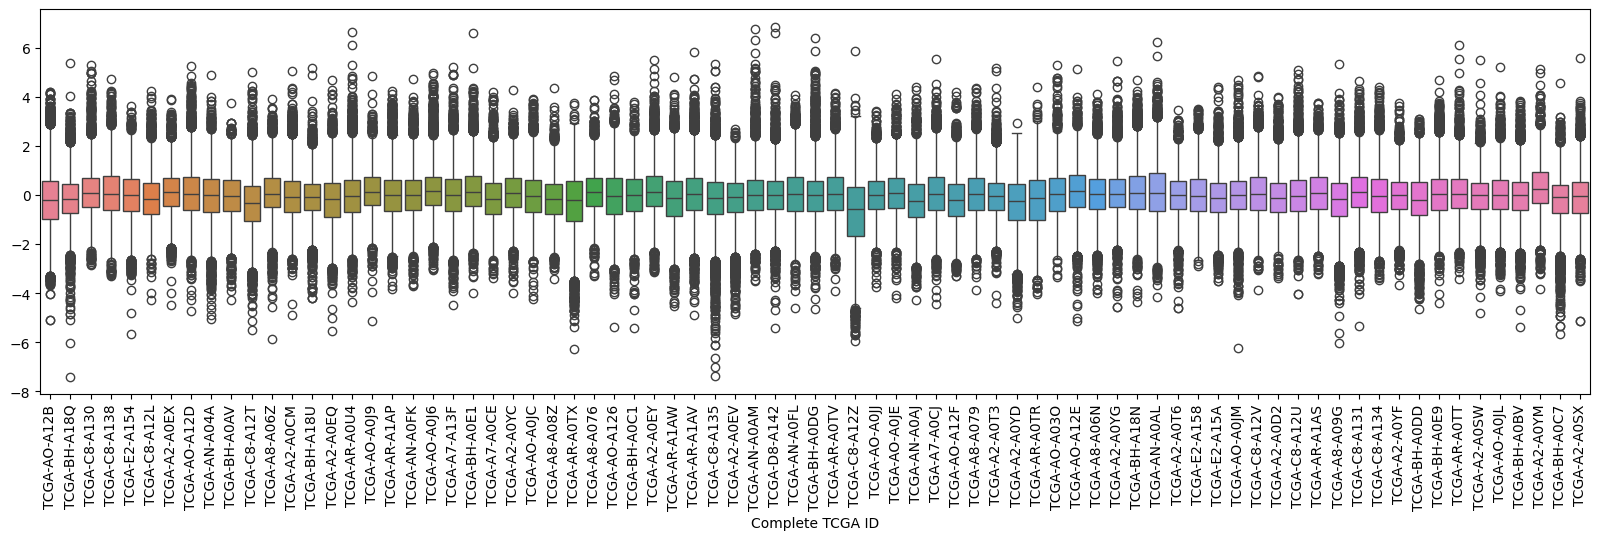

In [44]:
plt.figure(figsize=(20,5))
sns.boxplot(data = merged_dataset[protein_ids].T)
plt.xticks(rotation=90)
plt.show()

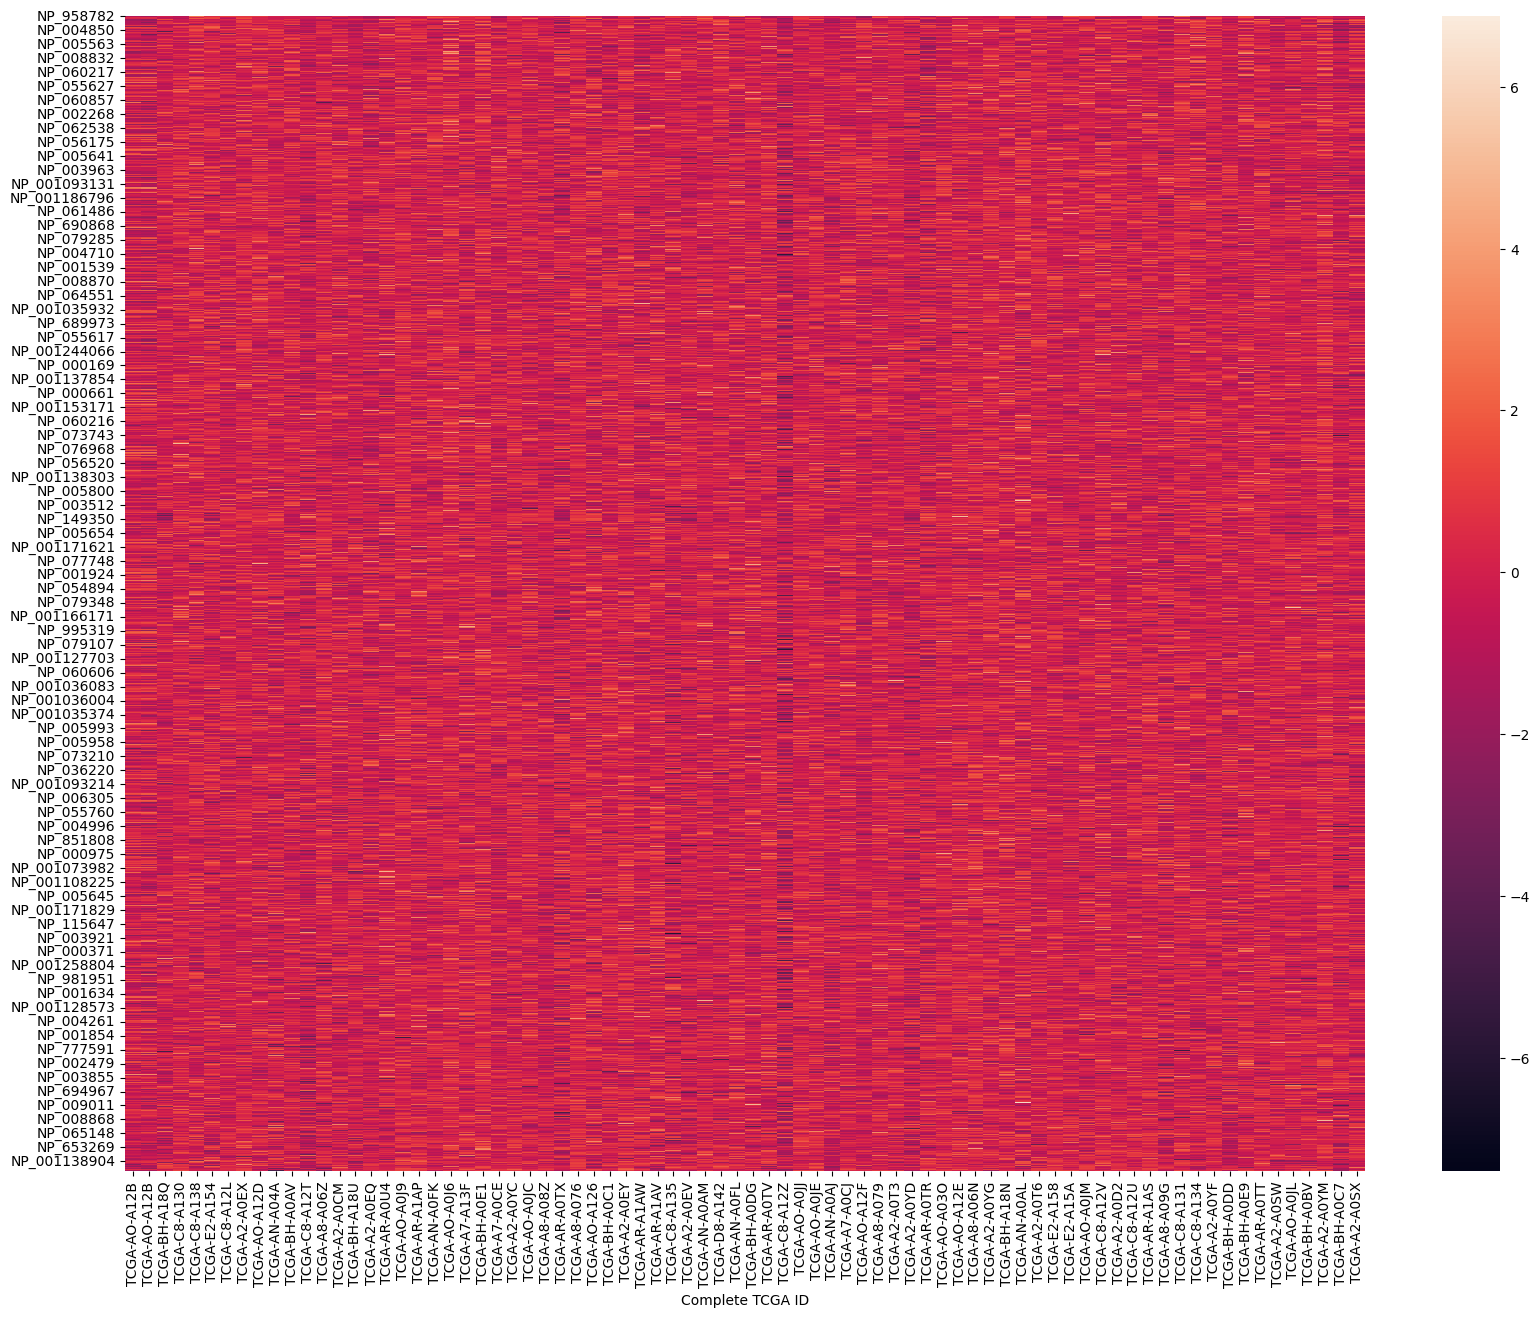

In [45]:
plt.figure(figsize=(20,15))
sns.heatmap(data = merged_dataset[protein_ids].T)
plt.show()